Universidade Federal do Sul e Sudeste do Pará
Faculdade de Computação e Engenharia Elétrica
Inteligência Artificial – Prof. Dr. Elton Alves
Atividade Avaliativa 2 – Aplicação de Fuzzy com Phyton

# Controle de sistema de irrigação
---

**Antecedentes (entradas)**

Temperatura: em graus celsius (20,0 a 40,0)
- baixa: 20,0 a 26,0
- média: 27,0 a 33,0
- alta: 34,0 a 40,0

Umidade do Solo: em porcentagem (0,0 a 100,0)
- baixa: 0,0 a 30,0
- média: 30,0 a 70,0
- alta: 71,0 a 100,0

**Consequente (saída)**

Pressão da água: qual o nível de pressão de água que deve ser configurado, entre 0% e 100%?
- baixa pressão: 0,0 e 30,0
- média pressão: 31,0 e 70,0
- alta pressão: 71,0 e 100,0

---

Regras
- Temperatura baixa e Umidade do solo baixa: média pressão
- Temperatura baixa e Umidade do solo média: baixa pressão
- Temperatura baixa e Umidade do solo alta: baixa pressão

- Temperatura média e Umidade do solo baixa: média pressão
- Temperatura média e Umidade do solo média: baixa pressão
- Temperatura média e Umidade do solo alta: baixa pressão

- Temperatura alta e Umidade do solo baixa: alta pressão
- Temperatura alta e Umidade do solo média: média pressão
- Temperatura alta e Umidade do solo alta: média pressão

## Instalação e importação das bibliotecas

In [1]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=61e56bb6a2ad210a821c2cc28f83f2107664f14a2d0963d29e0dd47b9c1ff952
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

##**Antecedentes e consequente**

In [3]:
np.arange(20, 41, 1)


array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40])

In [4]:
temperatura = ctrl.Antecedent(np.arange(20, 41, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')

In [5]:
temperatura

Antecedent: temperatura

In [6]:
umidade

Antecedent: umidade

In [7]:
temperatura.universe

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40])

In [8]:
pressao = ctrl.Consequent(np.arange(0, 101, 1), 'pressao')

##**Membership functions**

In [9]:
temperatura.automf(number = 3, names = ['baixa', 'media', 'alta'])
umidade.automf(number = 3, names = ['baixa', 'media', 'alta'])

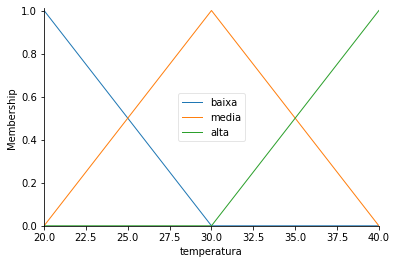

In [10]:
temperatura.view()

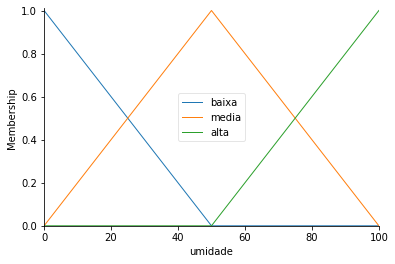

In [11]:
umidade.view()

In [12]:
pressao.universe

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [13]:
# função triangular
pressao['baixa'] = fuzzy.trimf(pressao.universe, [0, 0, 30])
pressao['media'] = fuzzy.trimf(pressao.universe, [0, 30, 70])
pressao['alta'] = fuzzy.trimf(pressao.universe, [30, 70, 100])

In [14]:
regra1 = ctrl.Rule(temperatura['baixa'] & umidade['baixa'], pressao['media'])
regra2 = ctrl.Rule(temperatura['baixa'] & umidade['media'], pressao['baixa'])
regra3 = ctrl.Rule(temperatura['baixa'] & umidade['alta'], pressao['baixa'])

regra4 = ctrl.Rule(temperatura['media'] & umidade['baixa'], pressao['media'])
regra5 = ctrl.Rule(temperatura['media'] & umidade['media'], pressao['baixa'])
regra6 = ctrl.Rule(temperatura['media'] & umidade['alta'], pressao['baixa'])

regra7 = ctrl.Rule(temperatura['alta'] & umidade['baixa'], pressao['alta'])
regra8 = ctrl.Rule(temperatura['alta'] & umidade['media'], pressao['media'])
regra9 = ctrl.Rule(temperatura['alta'] & umidade['alta'], pressao['media'])

## Sistema de Controle

In [15]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [16]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

32.89278752436645


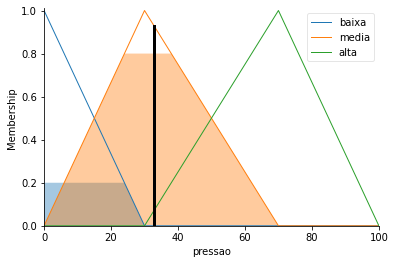

In [17]:
sistema.input['temperatura'] = 38
sistema.input['umidade'] = 90
sistema.compute()
print(sistema.output['pressao'])
pressao.view(sim = sistema)

23.051051051051076


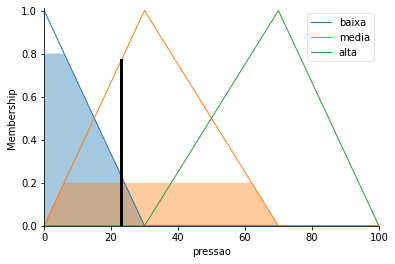

In [18]:
sistema.input['temperatura'] = 21
sistema.input['umidade'] = 40
sistema.compute()
print(sistema.output['pressao'])
pressao.view(sim = sistema)

32.57863539107695


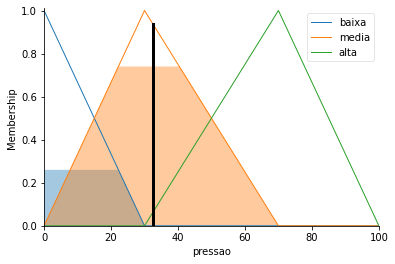

In [19]:
sistema.input['temperatura'] = 20
sistema.input['umidade'] = 13
sistema.compute()
print(sistema.output['pressao'])
pressao.view(sim = sistema)

9.999999999999998


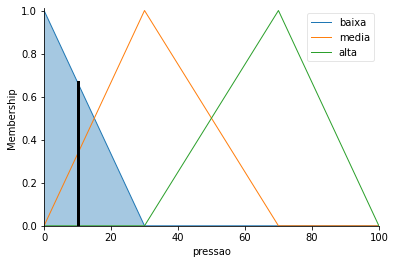

In [20]:
sistema.input['temperatura'] = 30
sistema.input['umidade'] = 50
sistema.compute()
print(sistema.output['pressao'])
pressao.view(sim = sistema)

## Outras Funções

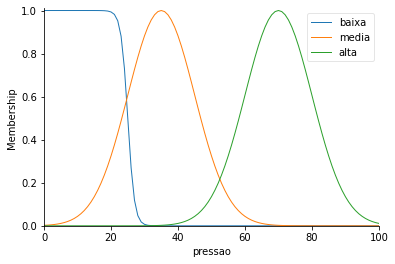

In [21]:
pressao['baixa'] = fuzzy.sigmf(pressao.universe, 25, -1)
pressao['media'] = fuzzy.gaussmf(pressao.universe, 35, 10)
# pressao['alta'] = fuzzy.pimf(pressao.universe, 30, 70, 100, 101)
pressao['alta'] = fuzzy.gaussmf(pressao.universe, 70, 10)

pressao.view()

https://scikit-fuzzy.readthedocs.io/en/latest/api/skfuzzy.html#skfuzzy.sigmf

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.html#skfuzzy.pimf

https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html#skfuzzy.membership.gaussmf



In [22]:
regra1 = ctrl.Rule(temperatura['baixa'] & umidade['baixa'], pressao['media'])
regra2 = ctrl.Rule(temperatura['baixa'] & umidade['media'], pressao['baixa'])
regra3 = ctrl.Rule(temperatura['baixa'] & umidade['alta'], pressao['baixa'])

regra4 = ctrl.Rule(temperatura['media'] & umidade['baixa'], pressao['media'])
regra5 = ctrl.Rule(temperatura['media'] & umidade['media'], pressao['baixa'])
regra6 = ctrl.Rule(temperatura['media'] & umidade['alta'], pressao['baixa'])

regra7 = ctrl.Rule(temperatura['alta'] & umidade['baixa'], pressao['alta'])
regra8 = ctrl.Rule(temperatura['alta'] & umidade['media'], pressao['media'])
regra9 = ctrl.Rule(temperatura['alta'] & umidade['alta'], pressao['media'])

In [23]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [24]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

32.280076122398654


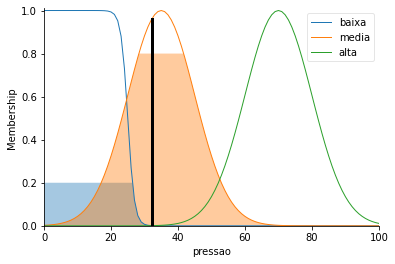

In [25]:
sistema.input['temperatura'] = 38
sistema.input['umidade'] = 90
sistema.compute()
print(sistema.output['pressao'])
pressao.view(sim=sistema)